# On Time Completion Data Analysis

 

This notebook performs analysis of data for on-time completion of workorders before and after modifications to the calculation of "on-time"  was implemented.

Some specific questions to engage in during this exploration include:
- How many workorders are now considered ontime with this new calculation vs with the old calculation?
- How has the overall performance changed on average with the implementation of this new calculation?
- How different are the new values in comparison to the old values?
- Are there any indications from the data that can explain extreme shifts (i.e. $\pm$ 100 $\%$ ) in values?

## Python Libraries

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

## Data Loading and Preprocessing 

Here the data was loaded, assessed for any transformations/cleaning needed, and summary statistics produced to get a better understanding of dataset.

## Import data

Loading in data...

In [359]:
#Import data from csv file
sc_df = pd.read_csv('ServiceChannel_OnTime.csv')
#display first 20 rows to confirm
sc_df.head(20)

,Provider Id,New On Time Arrival Metric,Previous On Time Arrival Metric,Completed Workorders Count
0,2000002190,0.0,1.0,7
1,2000002899,0.0,1.0,25
2,2000002907,0.0,1.0,15
3,2000008478,0.0,1.0,1
4,2000012489,0.0,1.0,3
5,2000013498,0.0,1.0,1
6,2000014615,0.0,1.0,2
7,2000015113,0.0,1.0,4
8,2000015407,0.0,1.0,1
9,2000015777,0.0,1.0,3


In [360]:
#determine row x column counts
sc_df.shape

(25445, 4)

We are dealing with a dataset with 25445 instances and 4 columns. 

Now let's see if there are any null values...

In [361]:
print(sc_df.isnull().sum())

#percentage of missing values from total dataset
print(round((161/25445)*100,2),"%")

Provider Id                          0
New On Time Arrival Metric         161
Previous On Time Arrival Metric      0
Completed Workorders Count           0
dtype: int64
0.63 %


It looks like we are missing 161 values for a "New On Time Arrival Metric." Since we were not given the exact calculations for determining the New On Time Arrival Metric and replacing the invalid values with a different value may skew the analysis, we don't have a reliable way to replace these missing values. Considering that the missing values account for $0.63\%$ of the total dataset, the best thing would be to drop these rows.

In [362]:
#dropping rows with NA values
sc_df.dropna(axis = 0,inplace = True)

#confirming rows were dropped
sc_df.isnull().sum()


Provider Id                        0
New On Time Arrival Metric         0
Previous On Time Arrival Metric    0
Completed Workorders Count         0
dtype: int64

We can take a look at some summary statistics to identify if there are any other data that is not appropriate or could skew the analysis.

In [363]:
#print out summary stats
sc_df.describe()

,Provider Id,New On Time Arrival Metric,Previous On Time Arrival Metric,Completed Workorders Count
count,2.528400e+04,25284.000000,25284.000000,25284.000000
mean,2.000090e+09,0.425385,0.516981,441.946646
std,3.912419e+04,0.342661,0.355587,6279.060323
min,2.000000e+09,0.000000,0.000000,1.000000
25%,2.000057e+09,0.071429,0.192308,4.000000
50%,2.000094e+09,0.412500,0.533333,16.000000
75%,2.000124e+09,0.692308,0.835802,89.000000
max,2.000150e+09,1.000000,1.000000,520101.000000


The arrival metrics columns have min and max values following typical proportional rules (between 0-1.0). We can see that the mean and general distribution of the "New On Time Arrival" has shifted down, implying a decrease in performance on average with the implementation of this new calculation

From the data, we can perform transformations that will add additional attributes to the dataset and aid with our analysis:

- Change in On Time Metric: Difference in proportion of on time metric using old calculation and new calculation
- Class: Classification variable to indicate if new calculation "Improved", "Worsened", or was "Unchanged."
- New Calc On Time Workorders: Count of workorders considered on time with new calculation
- Previous Calc On Time Workorders: Count of workorders considered on time with old calculation
- Change in On Time Workorders: Difference in count of workorders considered on time with old calculation and new calculation

In [364]:
warnings.filterwarnings('ignore')
#Calculate difference in metrics and add to dataset
sc_df["Change in On Time Metric"] = sc_df["New On Time Arrival Metric"]-sc_df["Previous On Time Arrival Metric"]
#Calculate workorders considered ontime w/ new calc and add to dataset
sc_df["New Calc on Time Workorders"] = sc_df["New On Time Arrival Metric"]*sc_df["Completed Workorders Count"]
sc_df["New Calc on Time Workorders"] = sc_df["New Calc on Time Workorders"].round(decimals=0)
#Calculate workorders considered ontime w/ old calc and add to dataset
sc_df["Previous Calc on Time Workorders"] = sc_df["Previous On Time Arrival Metric"]*sc_df["Completed Workorders Count"]
sc_df["Previous Calc on Time Workorders"] = sc_df["Previous Calc on Time Workorders"].round(decimals=0)
#Calculation difference in workorders and add to data set
sc_df["Change in on Time Workorders"] = sc_df["New Calc on Time Workorders"] - sc_df["Previous Calc on Time Workorders"]
#confirming all columns were added
sc_df.columns

Index(['Provider Id', 'New On Time Arrival Metric',
       'Previous On Time Arrival Metric', 'Completed Workorders Count',
       'Change in On Time Metric', 'New Calc on Time Workorders',
       'Previous Calc on Time Workorders', 'Change in on Time Workorders'],
      dtype='object')

In [365]:
#add classification attribute
class_metric = []

for key,value in sc_df["Change in on Time Workorders"].items():
    if value > 0:
        class_metric.append("Improved")
    elif value < 0 :
        class_metric.append("Worsened")
    else:
        class_metric.append("Unchanged")

sc_df["Class"] = class_metric

#checking in on updated dataset
print(sc_df.shape)
sc_df.head(10)


(25284, 9)


,Provider Id,New On Time Arrival Metric,Previous On Time Arrival Metric,Completed Workorders Count,Change in On Time Metric,New Calc on Time Workorders,Previous Calc on Time Workorders,Change in on Time Workorders,Class
0,2000002190,0.0,1.0,7,-1.0,0.0,7.0,-7.0,Worsened
1,2000002899,0.0,1.0,25,-1.0,0.0,25.0,-25.0,Worsened
2,2000002907,0.0,1.0,15,-1.0,0.0,15.0,-15.0,Worsened
3,2000008478,0.0,1.0,1,-1.0,0.0,1.0,-1.0,Worsened
4,2000012489,0.0,1.0,3,-1.0,0.0,3.0,-3.0,Worsened
5,2000013498,0.0,1.0,1,-1.0,0.0,1.0,-1.0,Worsened
6,2000014615,0.0,1.0,2,-1.0,0.0,2.0,-2.0,Worsened
7,2000015113,0.0,1.0,4,-1.0,0.0,4.0,-4.0,Worsened
8,2000015407,0.0,1.0,1,-1.0,0.0,1.0,-1.0,Worsened
9,2000015777,0.0,1.0,3,-1.0,0.0,3.0,-3.0,Worsened


## Data Analysis

Now it is time to start analyzing the dataset to try and answer the original questions posed:
- How many workorders are now considered ontime with this new calculation vs with the old calculation?
- How has the overall performance changed on average with the implementation of this new calculation?
- How different are the new values in comparison to the old values?
- Are there any indications from the data that can explain extreme shifts (i.e. $\pm$ 100 $\%$ ) in values?

In [366]:
#Calculate sum of Change in on Time Workorders
CWO_sum = sc_df["Change in on Time Workorders"].sum()

#Calculate proportion of change in on time workorders
CWO_prop = round((CWO_sum/(sc_df["Previous Calc on Time Workorders"].sum()))*100, 2)

print(CWO_sum,",", CWO_prop, "%")

-1460327.0 , -18.57 %


Here we see the with the implementation of the new calculation, 1460327 work orders were no longer considered on time, an 18% decrease in overall performance. 

Next let's take  a look at how the overall performance on average has changed with the implementation of the new calculation.

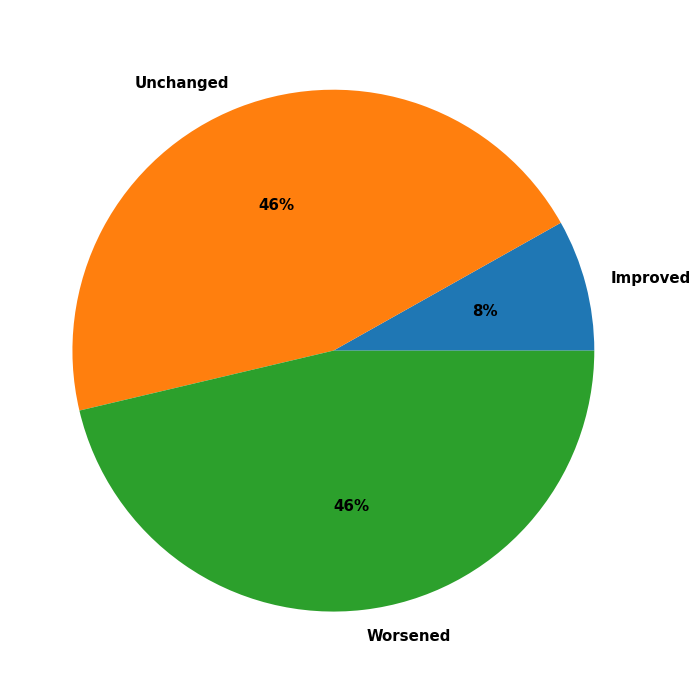

In [372]:

#Get counts of how new calculation affected what was considered on time
class_df = pd.DataFrame(sc_df.groupby(by = ["Class"])['Provider Id'].nunique())

#create pie chart reflecting class change
label= list(class_df.index)
class_plot, class_lab, pct = plt.pie(class_df['Provider Id'], labels = class_df.index, autopct = "%.0f%%")

#change labels font color and size
plt.setp(pct, color = 'black', fontweight = 'bold', fontsize = 15)
plt.setp(class_lab, color = 'black', fontweight = 'bold', fontsize = 15)
plt.title("Impact of New Calculation on On Time Performance", color = 'white', fontweight = 'bold', fontsize = 15)

#enlarge figure
fig = plt.gcf()
fig.set_size_inches(12,12)

plt.show()



Here we can see a breakdown of how the performance has changed since the implementation of the new calculation. Consistent with the observations of the summary statistics, about 46% of all providers had worsened performance compared to the previous calculation method. 46% remained unchanged and 8% improved. This seems to further support observations that the new calculation method may be adding additional factors that make the On-time criteria more strict.

Next, let's break down the distributions of how much the metrics changed between the New and Previous Calculation method.

In [368]:
sc_df['Change in On Time Metric'] = (sc_df['Change in On Time Metric'])*100
#sc_df.head(10)

#group the data by class and by 10% change increments in Change in On Time Metric
bin_inc = list(range(-100,110,10))
prop_change_df = sc_df.groupby(["Class",pd.cut(sc_df['Change in On Time Metric'], bin_inc)])
prop_change_df= pd.DataFrame(prop_change_df.size().unstack())

#see count breakdown
prop_change_df



Change in On Time Metric,"(-100, -90]","(-90, -80]","(-80, -70]","(-70, -60]","(-60, -50]","(-50, -40]","(-40, -30]","(-30, -20]","(-20, -10]","(-10, 0]","(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
Class,,,,,,,,,,,,,,,,,,,,
Improved,0,0,0,0,0,0,0,0,0,0,792,449,202,149,119,20,26,18,11,275
Unchanged,0,0,0,0,0,0,0,0,0,11513,1,0,0,0,0,0,0,0,0,0
Worsened,16,76,140,309,716,439,865,1489,2580,4351,0,0,0,0,0,0,0,0,0,0


Taking a quick look at the numbers, it appears most of the changes fall within $\pm 30 \%$. Let's visualize this distribution to confirm this and make any additional observations.

<AxesSubplot:title={'center':'Distribution of % Shifts from Previous Calculation'}, xlabel='Change in On Time Metric'>

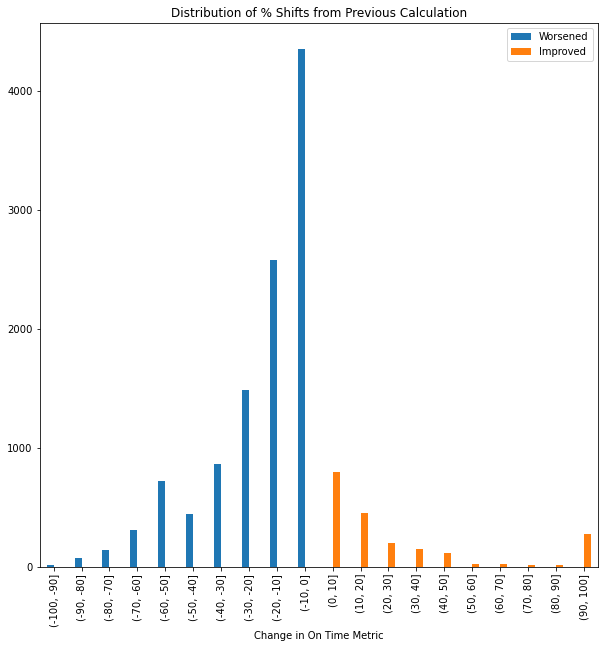

In [369]:
#plot distribution
chart_df = pd.DataFrame({"Worsened": prop_change_df.loc["Worsened"], "Improved": prop_change_df.loc["Improved"]}, index = prop_change_df.columns)
chart_df.plot(kind = 'bar',figsize = (10,10), title = "Distribution of % Shifts from Previous Calculation")

Here we can see the highest distribution within each group have metric changes of $\pm10\%$.  This begs the question about what level of difference can be considered significant to say that the new metric calculation and previous metric calculation produced different results i.e. what % difference, with the account of sampling variability, is the threshold for the new metric calculation and previous metric calculation to be considered different. An opportunity for additional statistical analysis in the form of Hypothesis testing presents itself...

Overall, there is a general decreasing trend as the % change bin increases, indicating that any shift in metric value as a result of the new calculation is most likely going to be within $\pm 30 \%$. However, an interesting observation is the spike in counts for the $90\% - 100\%$ shift.

In [370]:
#group the data by class and by Completed Workorder Count
WO_bin = list(range(0,700,100))
df_ext = sc_df[(sc_df['Change in On Time Metric'].between(left = 90, right = 100))]
df_ext = df_ext.groupby(['Class',pd.cut(df_ext['Completed Workorders Count'],WO_bin)])
df_ext.size().unstack()


Completed Workorders Count,"(0, 100]","(100, 200]","(200, 300]","(300, 400]","(400, 500]","(500, 600]"
Class,,,,,,
Improved,266,4,4,0,1,0


Here we can see that the vast majority of the extreme improvement shifts have completed workorders of $\le 100$. This value is pretty low comparatively to range of completed workorders per providers of this dataset. This could be indicative that at such low counts either calculation methods can cause the proportions to be exaggerated.

## Conclusion

From our analysis, some key takeaways we have gathered are as follow:
- With the implementation of the new calculation, 1460327 work orders were no longer considered on time, an 18% decrease in overall performance.
- Of all providers, 46% had worsened performance, 8% improved, and 46% remained unchanged compared to the previous calculation method.
- The majority of those differences are within $\pm 30 \%$ of their previous values, additional statistical analysis to be performed to determine significance threshold of % change.
- Spikes in extreme changes were observed in for improved performance, however additional investigation revealed this exageration of proportion could be due to comparatively low complete workorders count.

In conclusion, overall the implementation of this new calculation method contributes stricter classification On-time completion compared to the previous method. This impact can be especially significant to providers with larger quantities of submitted workorders as it relates to customer satisfication. 

Possible follow up analysis would be to perform additional statistical analysis in the form of Hypothesis testing to determine what % change, factoring in sampling variability, is considered significant. Additionally, it would be interesting to explore predictive models that can estimate on-time arrival times given existing attribute values and historic performance.